In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
silent = True
%run ../dataLoadAndPrepare.ipynb

The dataframe has the following structure:
                   Data Type
uniqueId               int64
indicatorId            int64
name                  object
measure             category
measureInfo         category
geoTypeName         category
geoJoinId              int64
geoPlaceName          object
timePeriod            object
startDate     datetime64[ns]
dataValue            float64


# Machine Learning - Teil 1

In [10]:
display(df.head())
display(df.count())

,uniqueId,indicatorId,name,measure,measureInfo,geoTypeName,geoJoinId,geoPlaceName,timePeriod,startDate,dataValue
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,2014-12-01,23.97
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,2014-12-01,27.42
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,2017-01-01,12.55
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,2015-12-01,22.63
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,2016-06-01,14.00


uniqueId        18862
indicatorId     18862
name            18862
measure         18862
measureInfo     18862
geoTypeName     18862
geoJoinId       18862
geoPlaceName    18862
timePeriod      18862
startDate       18862
dataValue       18862
dtype: int64

## Klassifikation (Logistic Regression)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2415
           1       1.00      1.00      1.00      1358

    accuracy                           1.00      3773
   macro avg       1.00      1.00      1.00      3773
weighted avg       1.00      1.00      1.00      3773



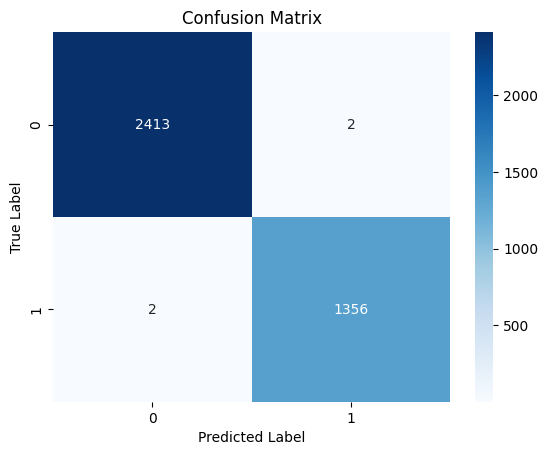

In [11]:
# Encoding categorical variables for classification
label_encoder = LabelEncoder()
df['geoPlaceName_encoded'] = label_encoder.fit_transform(df['geoPlaceName'])

# Defining features (using 'geoPlaceName' encoded) and labels (for classification, let's predict if NO2 > threshold)
threshold = df['dataValue'].mean()
df['highPollution'] = (df['dataValue'] > threshold).astype(int)

X = df[['geoPlaceName_encoded', 'dataValue']]
y = df['highPollution']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for classification
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_class = logreg.predict(X_test_scaled)

# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_class))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Regressionsproblem (Linear Regression)

Mean Squared Error for Linear Regression: 641.3527282524717


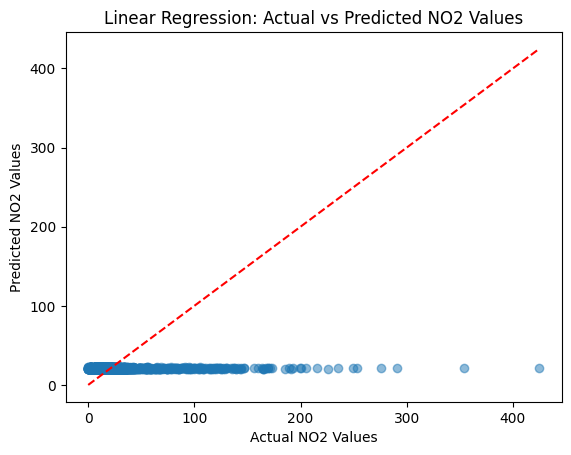

In [12]:
# For regression, we predict the NO2 value (dataValue)

# Define features and target variable
X_reg = df[['geoPlaceName_encoded']]
y_reg = df['dataValue']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scaling features
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = linreg.predict(X_test_reg_scaled)

# Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for Linear Regression: {mse}")

# Plotting actual vs predicted values
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual NO2 Values')
plt.ylabel('Predicted NO2 Values')
plt.title('Linear Regression: Actual vs Predicted NO2 Values')
plt.show()

# Machine Learning – Teil 2
## Clustering (KMeans & DBSCAN)

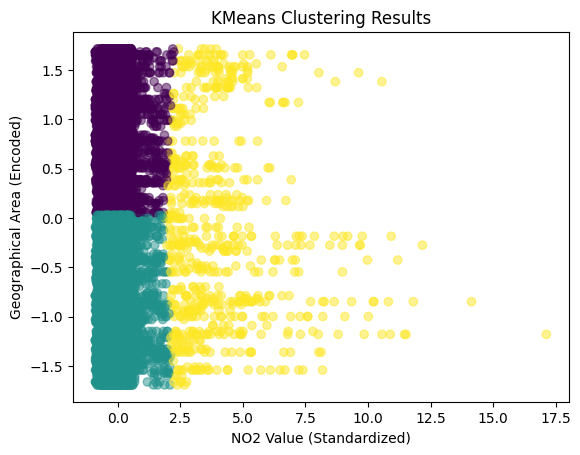

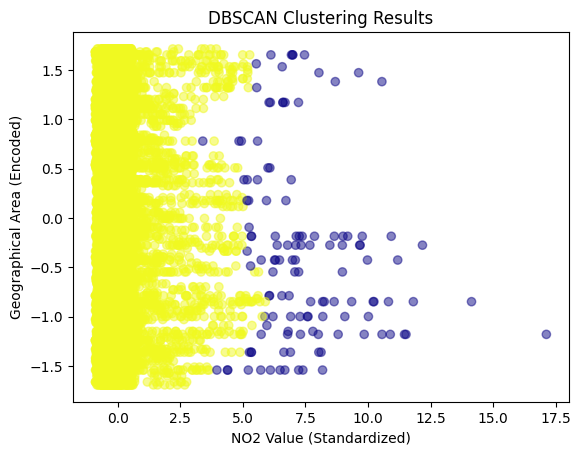

In [13]:
# Clustering with KMeans and DBSCAN
X_clustering = df[['dataValue', 'geoPlaceName_encoded']]

# Standardize features for clustering
X_clustering_scaled = scaler.fit_transform(X_clustering)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clustering_scaled)

# Plot KMeans Clustering results
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering Results')
plt.xlabel('NO2 Value (Standardized)')
plt.ylabel('Geographical Area (Encoded)')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_clustering_scaled)

# Plot DBSCAN Clustering results
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5)
plt.title('DBSCAN Clustering Results')
plt.xlabel('NO2 Value (Standardized)')
plt.ylabel('Geographical Area (Encoded)')
plt.show()
